### 1. Training an Autoencoder as a 2D Feature Generator and Displaying CIFAR-10 Features

Load CIFAR-10 Dataset

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
y_train = y_train.flatten()


Define and Train Autoencoder

In [8]:
from keras import layers, models

# Encoder with more layers
encoder = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)  # compressed 2D latent representation
])

# Decoder with symmetric architecture
decoder = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(2,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(32*32*3, activation='sigmoid'),
    layers.Reshape((32, 32, 3))
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0509
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0372
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0371
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0364
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0356
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0357
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0355
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0349
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0349


Visualize 2D Latent Features

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


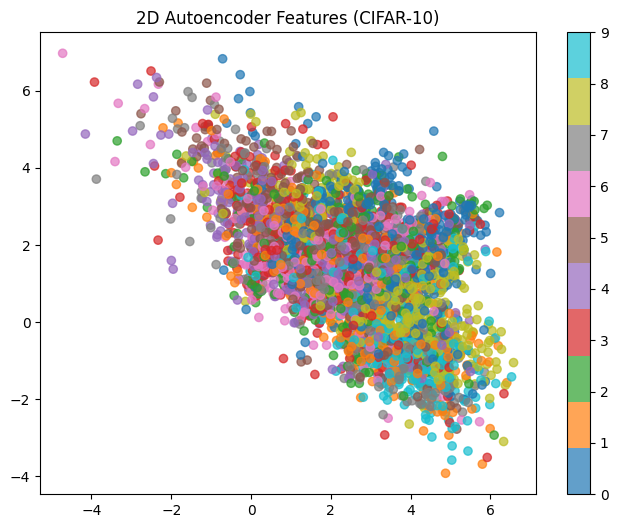

In [9]:
z = encoder.predict(x_train[:5000], batch_size=256)
labels = y_train[:5000]

plt.figure(figsize=(8, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title("2D Autoencoder Features (CIFAR-10)")
plt.show()


### Task 2: Compare with Pretrained CNN Features + PCA, t-SNE


Resize & Preprocess CIFAR-10 for ResNet

In [10]:
import tensorflow as tf
import numpy as np

# Load and subset CIFAR-10
(x_train_full, y_train_full), _ = tf.keras.datasets.cifar10.load_data()
x_train_full = x_train_full[:1000].astype("float32") / 255.0
y_train_full = y_train_full[:1000].flatten()

# Resize from 32x32 to 224x224
x_train_resized = tf.image.resize(x_train_full, [224, 224]).numpy()

# Load pretrained ResNet50 (without classification head)
resnet = tf.keras.applications.ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))
resnet.trainable = False

# Extract features
features_resnet = resnet.predict(x_train_resized, batch_size=32)
labels_resnet = y_train_full


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step


Apply PCA and t-SNE

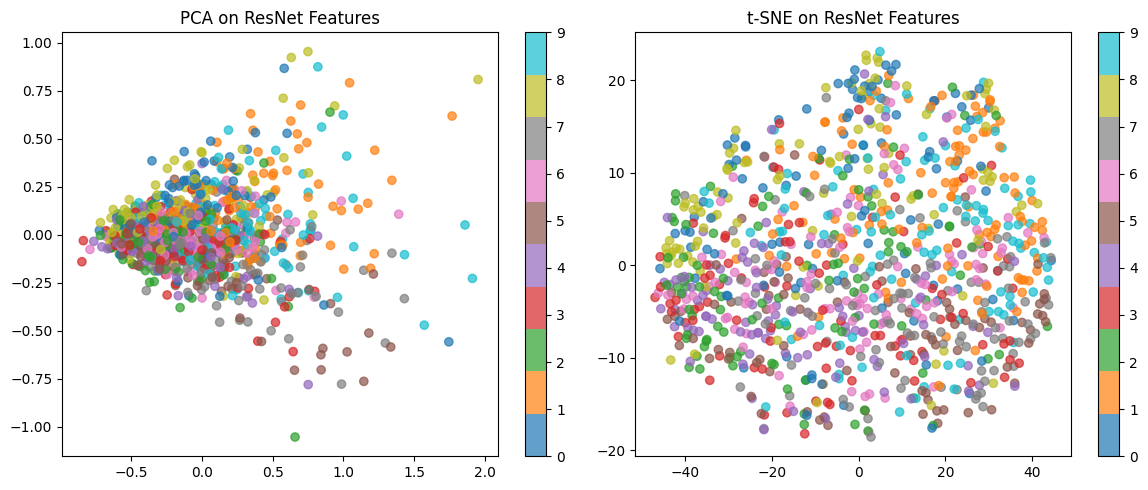

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


pca_feat = PCA(n_components=2).fit_transform(features_resnet)
tsne_feat = TSNE(n_components=2, init='pca', learning_rate='auto').fit_transform(features_resnet)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_feat[:, 0], pca_feat[:, 1], c=labels_resnet, cmap='tab10', alpha=0.7)
plt.title("PCA on ResNet Features")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(tsne_feat[:, 0], tsne_feat[:, 1], c=labels_resnet, cmap='tab10', alpha=0.7)
plt.title("t-SNE on ResNet Features")
plt.colorbar()

plt.tight_layout()
plt.show()
